# Library&Data Import

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [84]:
np.power(1.03, 2)

1.0609

In [3]:
data_raw = pd.read_csv("covid19_korea.csv", encoding="cp949")

In [4]:
data_raw.head()

,일자,계(명),국내발생(명),해외유입(명),사망(명)
0,2020-01-20,1,0,1,0.0
1,2020-01-21,0,0,0,0.0
2,2020-01-22,0,0,0,0.0
3,2020-01-23,0,0,0,0.0
4,2020-01-24,1,0,1,0.0


# Linear_Regression

In [67]:
data_linear_0120_0520 = data_raw.loc[(data_raw['일자'] >= "2021-01-20")&(data_raw['일자'] <= '2021-05-20')]

In [68]:
data_linear_0120_0520['idx'] = data_linear_0120_0520.index - 365

<ipython-input-68-08e9dc77f81f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_linear_0120_0520['idx'] = data_linear_0120_0520.index - 365


In [69]:
data_linear_0120_0520 = data_linear_0120_0520.rename(columns={"계(명)":"confirmed cases"})

In [70]:
data_linear_0120_0520.head()

,일자,confirmed cases,국내발생(명),해외유입(명),사망(명),idx
366,2021-01-20,404,373,31,17.0,1
367,2021-01-21,400,381,19,16.0,2
368,2021-01-22,346,314,32,12.0,3
369,2021-01-23,431,403,28,9.0,4
370,2021-01-24,392,369,23,12.0,5


In [73]:
def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    ax.text(.02, .9, f'slope={slope:.2f}, intercept={intercept:.2f}, r2={rvalue ** 2 : .2f}', transform=ax.transAxes)

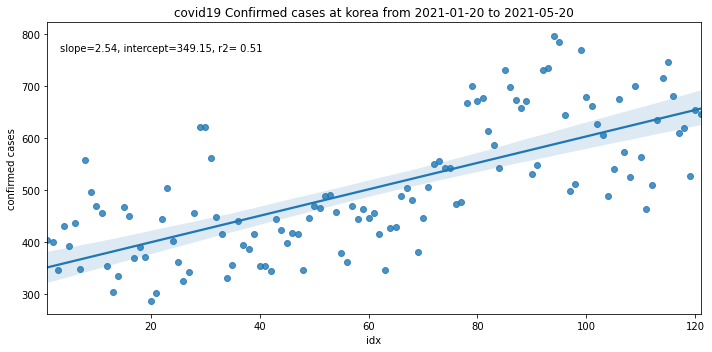

In [75]:
plt.figure(figsize=(10, 5))

ax = sns.regplot(x='idx', y='confirmed cases', data=data_linear_0120_0520)
annotate(ax, data=data_linear_0120_0520, x='idx', y='confirmed cases')
plt.title("covid19 Confirmed cases at korea from 2021-01-20 to 2021-05-20")
plt.tight_layout()
plt.show()

In [76]:
2.54*250 + 349.15

984.15

# Curve_fitting

In [87]:
def func(x, a, b):
    return np.power(a, x) + b

In [89]:
x = np.array(data_linear_0120_0520.idx)
y = np.array(data_linear_0120_0520['confirmed cases'])

In [90]:
params, _ = scipy.optimize.curve_fit(func, x, y)

In [91]:
params

array([  1.04772287, 453.29743834])

In [92]:
a, b = params[0], params[1]

In [105]:
yfit = np.power(a, 190) + b

In [106]:
yfit

7481.117043662958

In [ ]:
scipy.optimize.curve_fit